In [3]:
# Pankhuri Singhal
# 11/1/22
# Comparison of Full vs. Limited MLR Models of Flight Prices on New Routes
# This notebook's Python code attempts to create and evaluate two machine learning models for a dataset
# of flights and their prices (data taken from a real dataset, 1996 USA). One model has all the attributes 
# as the predictors, the other only includes predictors that would really be available for a new airport
# (i.e., an airport that has not had flights operating to/from it). 

# Part of a problem in my master's program, and I felt curious enough to code it with my limited knowledge. 
# I'll include the full dataset in the repo.

from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from math import sqrt

In [4]:
#fare vs all other predictors
#70% train, 30% valid --> test size - 0.3

dfAir = pd.read_csv("Airfares.csv")
dfAir.head()
dfAir.columns
selectIndex = ['COUPON', 'NEW', 'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP',
       'DISTANCE', 'PAX']
air_X = dfAir.loc[:, selectIndex] #all predictors

air_y = dfAir.loc[:, "FARE"]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_trainAir, X_validAir, y_trainAir, y_validAir = \
    train_test_split(air_X, air_y, test_size=0.3, random_state=22)

model = LinearRegression()
model.fit(X_trainAir, y_trainAir)

np.set_printoptions(precision=4, suppress=True)
print("Coefficients: ", model.coef_)
print("Intercept:")
print("%.4f" % model.intercept_)

#now predict
y_predAir = model.predict(X_validAir)

Coefficients:  [  9.3088  -0.6511 -42.9638   0.0085   0.0026   0.0023   0.       0.
   0.0663  -0.0012]
Intercept:
-113.5858


In [8]:
# predicting the average fare of a sample route
# y_samplePredAir = model.predict([["COUPON"=1.202, "NEW"=3, "SW"= 0, "HI" = 4442.141, "S_INCOME" = 28760, 
#    "E_INCOME" = 27664, "S_POP" = 4557004, "E_POP" = 3195503, "PAX" = 12782, "DISTANCE" = 1976.]])

y_sampPredAir = model.predict([[1.202, 3, 0, 4442.141, 28760, 27664, 4557004, 3195503, 12782, 1976]])
print("%.2f" % y_sampPredAir, "dollars")

971.65 dollars


C:\Users\pankh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#using the same attributes as the sample route in the previous code block
#comparing the average fare if Southwest Airlines decides to service the route, vs if not

#if Southwest services the airport
y_sampPredAirWithSW = model.predict([[1.202, 3, 1, 4442.141, 28760, 27664, 4557004, 3195503, 12782, 1976]])
print("With Southwest serving the route:")
print(y_sampPredAirWithSW)
print()

#if southwest does NOT service the route
#recall: southwest is a low-fare airline
print("Without Southwest serving the route:")
y_sampPredAirWithoutSW = model.predict([[1.202, 3, 0, 4442.141, 28760, 27664, 4557004, 3195503, 12782, 1976]])
print(y_sampPredAirWithoutSW) # $43 increase without SW serving the route

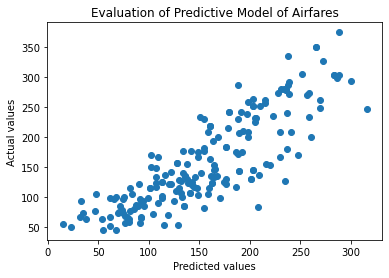

In [9]:
#evaluate predictive performance of the MLR model with scatter plot

npPredictedValidSet = np.array(y_predAir) 

npActualValidSet = y_validAir 

plt.scatter(npPredictedValidSet, npActualValidSet)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Evaluation of Predictive Model of Airfares")
plt.show() #has a positive correlation, which is a good sign, but a weak one.

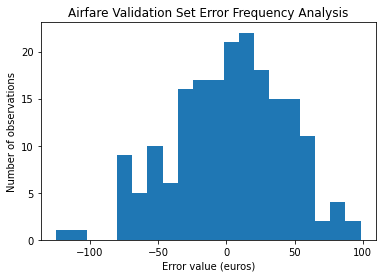

In [10]:
# evaluating the freuqncy and type of errors in this MLR model
#using an error histogram

numBins = 20
e = y_validAir - y_predAir
npError = np.array(e)

plt.hist(npError, numBins)
plt.xlabel("Error value (euros)")
plt.ylabel("Number of observations")
plt.title("Airfare Validation Set Error Frequency Analysis")
plt.show()

Coefficients:  [0.011  0.0039 0.0023 0.     0.     0.0807]
Intercept:
-183.1976


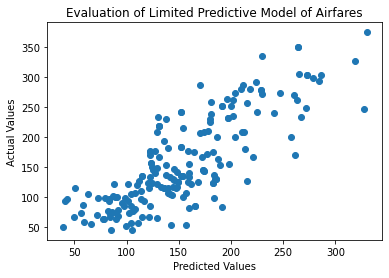

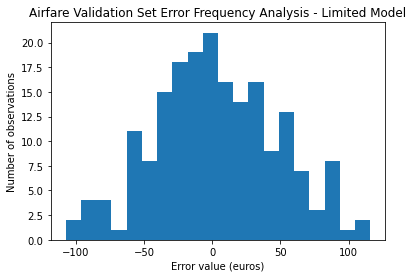

In [11]:
#coding the second MLR model, without attributes that may contain null values in real life,
#for airports that don't have flights operating on them yet
#these such "invisible" attributes are: PAX, NEW, SW, and COUPON
#expected: will not be as good/accurate as the old model

dfAirNew = pd.read_csv("Airfares.csv")    
dfAirNew.head()   
dfAirNew = dfAirNew.drop(['COUPON', 'NEW', 'SW', 'PAX'], axis = 1) #dropped "invisible" attributes
dfAirNew.head() 
selectIndex = ['HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP',
       'DISTANCE']

#establishing the predictor and target sets
air_X_new = dfAirNew.loc[:, selectIndex]
air_X_new
air_y_new = dfAirNew.loc[:, "FARE"]
air_y_new

#establishing the training and validation sets;
#the random seed of 22 is the same, with the same partition as in the old model
X_trainAirNew, X_validAirNew, y_trainAirNew, y_validAirNew = \
    train_test_split(air_X_new, air_y_new, test_size = 0.3, random_state = 22)

#fitting the new model
modelNew = LinearRegression()
modelNew.fit(X_trainAirNew, y_trainAirNew)

#printing out coefficients of new model
np.set_printoptions(precision=4, suppress=True)
print("Coefficients: ", modelNew.coef_)
print("Intercept:")
print("%.4f" % modelNew.intercept_)

#now prediction
y_predAirNew = modelNew.predict(X_validAirNew)

#scatter plot of new model's performance -- actual vs predicted
npPredictedValsNew = np.array(y_predAirNew)
npActualValidsNew = y_validAirNew
#print(npActualValidsNew)
plt.scatter(npPredictedValsNew, npActualValidsNew)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Evaluation of Limited Predictive Model of Airfares")
plt.show()

#error histogram
numBinsNew = 20
eNew = y_validAirNew - y_predAirNew
npErrorNew = np.array(eNew)
plt.hist(npErrorNew, numBinsNew)
plt.xlabel("Error value (euros)")
plt.ylabel("Number of observations")
plt.title("Airfare Validation Set Error Frequency Analysis - Limited Model")
plt.show()

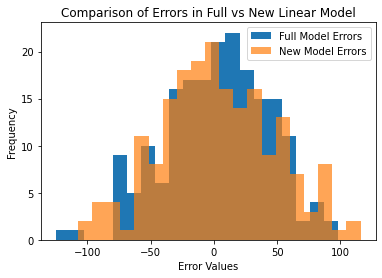

RMSE for old model:
41.21 dollars
Normalized RMSE of Old Model:  0.125051114237665

RMSE for new model:
45.32 dollars
Normalized RMSE of New Model:  0.13753217704931361


In [13]:
#evaluating predictive power of the new, limited model
#by making error histograms

plt.hist(npError, numBins)
plt.hist(npErrorNew, numBinsNew, alpha = 0.7) #orange
plt.xlabel("Error Values")
plt.ylabel("Frequency")
plt.title("Comparison of Errors in Full vs New Linear Model")
plt.legend(["Full Model Errors", "New Model Errors"])
plt.show()
#note that new model has same errors closer to 0.
#old model is skewed a bit to the right in terms of most frequent error value

#RMSE calculation -- to strengthen insights into predictive power of 1st model vs 2nd
print("RMSE for old model:")
e = y_validAir - y_predAir
rmseOld = np.sqrt(np.mean(e**2))
print("%.2f" % rmseOld, "dollars") #41.2 -- a better fit than new
npOldValidSet = np.array(y_validAir)
npOldValidSet = np.array(y_validAir)
npOldValidSet
normRMSEOld = rmseOld / (npOldValidSet.max() - npOldValidSet.min())
print("Normalized RMSE of Old Model: ", normRMSEOld)
print()

print("RMSE for new model:")
eNew = y_validAirNew - y_predAirNew
rmseNew = np.sqrt(np.mean(eNew**2))
print("%.2f" % rmseNew, "dollars") #45.3 -- not the best fit
npNewValidSet = np.array(y_validAirNew)
npNewValidSet = np.array(y_validAirNew)
npNewValidSet
normRMSENew = rmseNew / (npNewValidSet.max() - npNewValidSet.min())
print("Normalized RMSE of New Model: ", normRMSENew) #slightly higher! means it's worse!

#the primary decision here was to 1) use the limited/new model for airports that do not have flights to/from
#that airport; or, 2) retrain the old model for such airports.

#the newer model's normalized RMSE is higher than that of the old model.
#therefore, it is worse at predicting airfares accurately.
#therefore, retrain the old model once the new airport opens up.